In [23]:
import nltk
import numpy as np
import random
import string # to process standard python strings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
### download nltk

In [2]:
# nltk.download('punkt') # first-time use only
# nltk.download('wordnet') # first-time use only
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download("treebank")
# nltk.download("averaged_perceptron_tagger")
dir(nltk)


['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGraph',
 'Depen

In [24]:
f=open('exampledir/chatbot.txt','r',errors = 'ignore')
raw=f.read()
raw=raw.lower()# converts to lowercase
# nltk.download('punkt') # first-time use only
# nltk.download('wordnet') # first-time use only
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [27]:
sent_tokens

['hey, please take a note for me.',
 'what was my last note?',
 'hey, go ahead and delete my previous note.',
 "what's total number of notes that i have?"]

In [28]:
word_tokens

['hey',
 ',',
 'please',
 'take',
 'a',
 'note',
 'for',
 'me',
 '.',
 'what',
 'was',
 'my',
 'last',
 'note',
 '?',
 'hey',
 ',',
 'go',
 'ahead',
 'and',
 'delete',
 'my',
 'previous',
 'note',
 '.',
 'what',
 "'s",
 'total',
 'number',
 'of',
 'notes',
 'that',
 'i',
 'have',
 '?']

In [6]:
INTENT_LIST = sent_tokens

In [7]:
lemmer = nltk.stem.WordNetLemmatizer()
# WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [ ]:
### greeeting funtion

In [8]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [ ]:
### respond function

In [9]:
def response(sentence):
    response=''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokenss)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        response = response+"I am sorry! I don't understand you"
        return response
    else:
        response = response+sent_tokens[idx]
        return response

In [ ]:
### main respond

In [22]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                sent_tokens.append(user_response)
                word_tokens=word_tokens+nltk.word_tokenize(user_response)
                final_words=list(set(word_tokens))
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")


ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
Hey, please take a note for me.
ROBO: hey, please take a note for me.
bye
ROBO: Bye! take care..


In [ ]:
### testv nltk ne_chunk

In [19]:
sent = ["What was the second note I took?", 
        "What note did I take about oranges?", 
        "Remind me to buy three oranges tomorrow.",
        "Attend birthday party",
        "This is my sixty-first book",
        "This is my sixty first book",
        "Take a note and tell me",
        "What is the total number of notes I have",
        "What note do I take about oranges",
        "This is my 2nd sentence",
        ""]

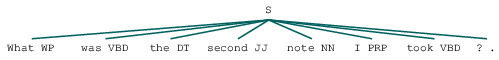

In [17]:
nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent[0])))

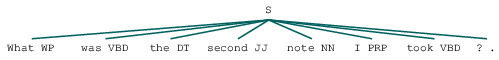

In [18]:
nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent[0])), binary = True)

In [ ]:
### import spacy

In [1]:
import spacy
from spacy import displacy
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
### test spacy

In [29]:
# doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
doc = nlp(sent[-2])
print([(X, X.ent_iob_, X.ent_type_) for X in doc])
print([(X.text, X.label_) for X in doc.ents])

[(What, 'O', ''), (note, 'O', ''), (do, 'O', ''), (I, 'O', ''), (take, 'O', ''), (about, 'O', ''), (oranges, 'O', '')]
[]


In [30]:
[(x.orth_,x.pos_, x.lemma_) for x in [y
                                      for y
                                      in doc
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('What', 'ADJ', 'what'),
 ('note', 'NOUN', 'note'),
 ('I', 'PRON', '-PRON-'),
 ('oranges', 'NOUN', 'orange')]

In [46]:
sentence_nlp = nlp(sent[0])
any([True for token in sentence_nlp.ents if token.label_ == 'ORDINAL'])

False

In [ ]:
[('What', 'NOUN', 'what'),
 ('second', 'ADJ', 'second'),
 ('note', 'NOUN', 'note'),
 ('I', 'PRON', '-PRON-'),
 ('took', 'VERB', 'take')]

In [ ]:
### test rake_nltk

In [37]:
from rake_nltk import Rake

In [52]:
r = Rake()
# r.extract_keywords_from_sentences(sent)
r.extract_keywords_from_text(sent[2])
print(r.get_ranked_phrases())
print(r.get_ranked_phrases_with_scores())
dat = r.get_ranked_phrases_with_scores()

['buy three oranges tomorrow', 'remind']
[(16.0, 'buy three oranges tomorrow'), (1.0, 'remind')]


In [57]:
for pair in dat:
    score = pair[0]
    phrase = nlp(pair[1])
    print([token.lemma_ for token in phrase if token.pos_=="NOUN" and token.lemma_ not in ["note", "tomorrow"]])

['orange']
[]


In [ ]:
### test words to number, number to words package

In [26]:
from pattern.en import number
from num2words import num2words
from nltk.stem import PorterStemmer

In [7]:
number('two')

2

In [19]:
PorterStemmer().stem("second")

'second'

In [31]:
num2words(42, to="ordinal")

'forty-second'

In [ ]:
### Train a Spacy model

In [33]:
from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding

In [36]:
TRAIN_DATA = [
    ("How many notes do I have?", {
        'entities': [(4, 8, 'KEY')]
    }),
    ("What's total number of notes that I have?", {
        'entities': [(7, 12, 'KEY')]
    })
]

In [37]:
@plac.annotations(
    model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_iter=("Number of training iterations", "option", "n", int))
def main(model=None, output_dir=None, n_iter=100):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank('en')  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe('ner')

    # add labels
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses = {}
            # batch up the examples using spaCy's minibatch
            batches = minibatch(TRAIN_DATA, size=compounding(4., 32., 1.001))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            print('Losses', losses)

    # test the trained model
    for text, _ in TRAIN_DATA:
        doc = nlp(text)
        print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
        print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        for text, _ in TRAIN_DATA:
            doc = nlp2(text)
            print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
            print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])
main()

Created blank 'en' model
Losses {'ner': 2.0204773001814047}
Losses {'ner': 2.8061910099922898}
Losses {'ner': 2.3655424193439614}
Losses {'ner': 2.818284262101315}
Losses {'ner': 1.4631666326242643}
Losses {'ner': 2.2881409064866602}
Losses {'ner': 1.2097818692272995}
Losses {'ner': 1.5129572994121645}
Losses {'ner': 1.0037403130663733}
Losses {'ner': 2.2118629975018154}
Losses {'ner': 0.473596593622406}
Losses {'ner': 0.6087297875829717}
Losses {'ner': 0.9610378429890611}
Losses {'ner': 0.0007179025847769971}
Losses {'ner': 1.1392049424315518}
Losses {'ner': 1.017268971730755}
Losses {'ner': 0.31564609144009825}
Losses {'ner': 0.1985648165007902}
Losses {'ner': 0.4541855960938251}
Losses {'ner': 4.051389103494067e-05}
Losses {'ner': 0.06024297409365312}
Losses {'ner': 0.27072902638532265}
Losses {'ner': 0.3380666550510801}
Losses {'ner': 0.01003031003210753}
Losses {'ner': 1.0004639159888267}
Losses {'ner': 0.0007155297747959876}
Losses {'ner': 3.1455095137869173e-07}
Losses {'ner': 0